In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = data['label'].values
features = data.drop(['label'], axis=1).values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [6]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

num_classes = len(class_names)

In [7]:
x_train.shape

(48000, 784)

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [9]:
x_train = x_train/255.
x_test = x_test/255.

In [10]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, MaxPooling2D, Dense, Input, Conv2DTranspose, UpSampling2D, Reshape, BatchNormalization

In [27]:
input_ = Input(shape=(28,28,1))

x = Flatten()(input_)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(784, activation='relu')(x)
x = Reshape(target_shape=(28,28,1))(x)

In [28]:
autoencoder = Model(input_, x)

autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='mean_squared_error',
)

autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_61 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_62 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_63 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_64 (Dense)             (None, 16)                528 

In [29]:
x_train[0].shape

(28, 28, 1)

In [30]:
autoencoder.fit(
    x=x_train,
    y=x_train,
    validation_data=(x_test, x_test),
    shuffle=True,
    epochs=50,
    batch_size=256
)

Epoch 1/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0734 - val_loss: 0.0413
Epoch 2/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0335 - val_loss: 0.0295
Epoch 3/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0276 - val_loss: 0.0259
Epoch 4/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0253 - val_loss: 0.0239
Epoch 5/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0236 - val_loss: 0.0231
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0230 - val_loss: 0.0225
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0224 - val_loss: 0.0220
Epoch 8/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0219 - val_loss: 0.0220
Epoch 9/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0214 - val_loss: 0.0211
Epoch 10/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0210 - val_loss: 0.0206

In [31]:
def display(a1, a2):
    n = 10
    idxs = np.random.randint(len(a1), size=n)
    imgs1 = a1[idxs, :]
    imgs2 = a2[idxs, :]
    
    plt.figure(figsize=(20,4))
    for i, (img1, img2) in enumerate(zip(imgs1, imgs2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(img1.reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(img2.reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    plt.show()

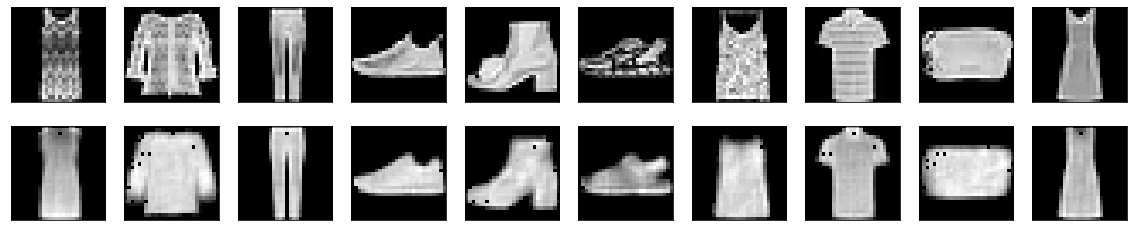

In [32]:
preds = autoencoder.predict(x_test)
display(x_test, preds)

In [38]:
# conv layer 1
x = autoencoder(input_)
x = Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(28,28,1))(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# conv layer 2
x = Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(28,28,1))(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Flatten()(x)

# fixed layer
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layer
x = Dense(num_classes, activation='softmax')(x)

model = Model(input_, x)

In [39]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
model_5 (Functional)         (None, 28, 28, 1)         490208    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        3692

In [40]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [41]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=50)

Epoch 1/50


2023-02-02 10:57:14.501930: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


750/750 [==============================] - 12s 7ms/step - loss: 0.7598 - accuracy: 0.7402 - val_loss: 0.5108 - val_accuracy: 0.8202
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.5109 - accuracy: 0.8266 - val_loss: 0.4289 - val_accuracy: 0.8413
Epoch 3/50
750/750 [==============================] - 4s 6ms/step - loss: 0.4513 - accuracy: 0.8470 - val_loss: 0.3805 - val_accuracy: 0.8628
Epoch 4/50
750/750 [==============================] - 5s 7ms/step - loss: 0.4229 - accuracy: 0.8585 - val_loss: 0.3750 - val_accuracy: 0.8658
Epoch 5/50
750/750 [==============================] - 4s 6ms/step - loss: 0.3892 - accuracy: 0.8679 - val_loss: 0.3548 - val_accuracy: 0.8754
Epoch 6/50
750/750 [==============================] - 5s 6ms/step - loss: 0.3743 - accuracy: 0.8729 - val_loss: 0.3952 - val_accuracy: 0.8651
Epoch 7/50
750/750 [==============================] - 4s 6ms/step - loss: 0.3623 - accuracy: 0.8775 - val_loss: 0.3495 - val_accuracy: 0.8771
Epoch 8/50
750/7

## Previous rate without Autoencoders:

Epoch 1/50
750/750 [==============================] - 3s 4ms/step - loss: 0.8098 - accuracy: 0.7041 - val_loss: 0.4616 - val_accuracy: 0.8266

Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.5534 - accuracy: 0.7972 - val_loss: 0.3962 - val_accuracy: 0.8533

Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4982 - accuracy: 0.8187 - val_loss: 0.3637 - val_accuracy: 0.8677

Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4683 - accuracy: 0.8315 - val_loss: 0.3411 - val_accuracy: 0.8777

Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4404 - accuracy: 0.8400 - val_loss: 0.3235 - val_accuracy: 0.8830

Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4262 - accuracy: 0.8465 - val_loss: 0.3037 - val_accuracy: 0.8873

Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4126 - accuracy: 0.8515 - val_loss: 0.2939 - val_accuracy: 0.8910

Epoch 8/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3954 - accuracy: 0.8567 - val_loss: 0.2837 - val_accuracy: 0.8960

Epoch 9/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3878 - accuracy: 0.8596 - val_loss: 0.2780 - val_accuracy: 0.9021

Epoch 10/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3798 - accuracy: 0.8602 - val_loss: 0.2845 - val_accuracy: 0.8973

Epoch 11/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3733 - accuracy: 0.8646 - val_loss: 0.2678 - val_accuracy: 0.9035

Epoch 12/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3653 - accuracy: 0.8671 - val_loss: 0.2621 - val_accuracy: 0.9076

Epoch 13/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3586 - accuracy: 0.8683 - val_loss: 0.2546 - val_accuracy: 0.9072

Epoch 14/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3564 - accuracy: 0.8717 - val_loss: 0.2669 - val_accuracy: 0.9038

Epoch 15/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3489 - accuracy: 0.8735 - val_loss: 0.2587 - val_accuracy: 0.9070

Epoch 16/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3474 - accuracy: 0.8742 - val_loss: 0.2470 - val_accuracy: 0.9119

Epoch 17/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3423 - accuracy: 0.8745 - val_loss: 0.2557 - val_accuracy: 0.9053

Epoch 18/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3374 - accuracy: 0.8762 - val_loss: 0.2466 - val_accuracy: 0.9097

Epoch 19/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3410 - accuracy: 0.8762 - val_loss: 0.2461 - val_accuracy: 0.9112

Epoch 20/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3356 - accuracy: 0.8772 - val_loss: 0.2432 - val_accuracy: 0.9147

Epoch 21/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3301 - accuracy: 0.8800 - val_loss: 0.2376 - val_accuracy: 0.9125

Epoch 22/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3296 - accuracy: 0.8792 - val_loss: 0.2507 - val_accuracy: 0.9101

Epoch 23/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3284 - accuracy: 0.8801 - val_loss: 0.2478 - val_accuracy: 0.9099

Epoch 24/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3253 - accuracy: 0.8827 - val_loss: 0.2508 - val_accuracy: 0.9099

Epoch 25/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3257 - accuracy: 0.8809 - val_loss: 0.2370 - val_accuracy: 0.9154

Epoch 26/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3181 - accuracy: 0.8827 - val_loss: 0.2323 - val_accuracy: 0.9154

Epoch 27/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3230 - accuracy: 0.8806 - val_loss: 0.2322 - val_accuracy: 0.9159

Epoch 28/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3210 - accuracy: 0.8821 - val_loss: 0.2370 - val_accuracy: 0.9136

Epoch 29/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3179 - accuracy: 0.8851 - val_loss: 0.2350 - val_accuracy: 0.9148

Epoch 30/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3157 - accuracy: 0.8846 - val_loss: 0.2321 - val_accuracy: 0.9170

Epoch 31/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3175 - accuracy: 0.8845 - val_loss: 0.2380 - val_accuracy: 0.9147

Epoch 32/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3126 - accuracy: 0.8839 - val_loss: 0.2331 - val_accuracy: 0.9153

Epoch 33/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3106 - accuracy: 0.8859 - val_loss: 0.2278 - val_accuracy: 0.9186

Epoch 34/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3116 - accuracy: 0.8859 - val_loss: 0.2290 - val_accuracy: 0.9197

Epoch 35/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3100 - accuracy: 0.8860 - val_loss: 0.2240 - val_accuracy: 0.9197

Epoch 36/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3109 - accuracy: 0.8849 - val_loss: 0.2256 - val_accuracy: 0.9203

Epoch 37/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3099 - accuracy: 0.8870 - val_loss: 0.2276 - val_accuracy: 0.9186

Epoch 38/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3066 - accuracy: 0.8875 - val_loss: 0.2313 - val_accuracy: 0.9168

Epoch 39/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3062 - accuracy: 0.8868 - val_loss: 0.2278 - val_accuracy: 0.9172

Epoch 40/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3058 - accuracy: 0.8863 - val_loss: 0.2264 - val_accuracy: 0.9193

Epoch 41/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3048 - accuracy: 0.8853 - val_loss: 0.2302 - val_accuracy: 0.9184

Epoch 42/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3030 - accuracy: 0.8880 - val_loss: 0.2406 - val_accuracy: 0.9123

Epoch 43/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3025 - accuracy: 0.8889 - val_loss: 0.2266 - val_accuracy: 0.9162

Epoch 44/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3047 - accuracy: 0.8889 - val_loss: 0.2237 - val_accuracy: 0.9200

Epoch 45/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2957 - accuracy: 0.8912 - val_loss: 0.2249 - val_accuracy: 0.9188

Epoch 46/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3031 - accuracy: 0.8883 - val_loss: 0.2320 - val_accuracy: 0.9156

Epoch 47/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3018 - accuracy: 0.8884 - val_loss: 0.2229 - val_accuracy: 0.9181

Epoch 48/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2937 - accuracy: 0.8917 - val_loss: 0.2187 - val_accuracy: 0.9232

Epoch 49/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2986 - accuracy: 0.8914 - val_loss: 0.2210 - val_accuracy: 0.9222

Epoch 50/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2968 - accuracy: 0.8896 - val_loss: 0.2179 - val_accuracy: 0.9214

In [42]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [43]:
def show_example(index, preds, dsx, dsy):
    current_img = dsx[index][:, :, 0] * 255
    prediction = np.argmax(preds[index])
    labelP = class_names[prediction]
    if(len(dsy) > 0 or dsy != None) :
        label = class_names[dsy[index]]
        print("Label:", label)
    print("Prediction:", labelP)
    
    
    plt.imshow(current_img, interpolation='nearest', cmap='gray')
    plt.show()

In [44]:
preds = model.predict(x_test)

Label: Sneaker
Prediction: Sneaker


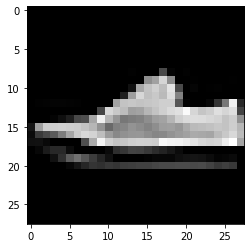

Label: Bag
Prediction: Bag


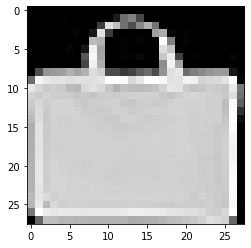

Label: Bag
Prediction: Bag


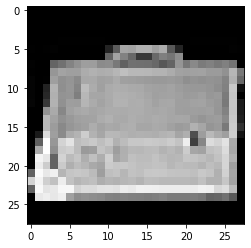

Label: Sandal
Prediction: Sandal


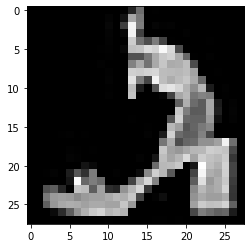

Label: Ankle boot
Prediction: Ankle boot


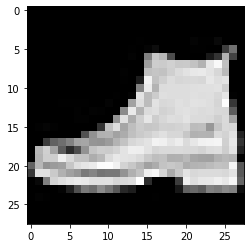

Label: Trouser
Prediction: Trouser


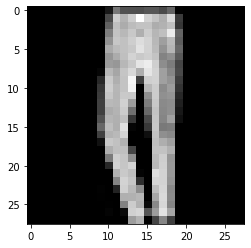

Label: Pullover
Prediction: Pullover


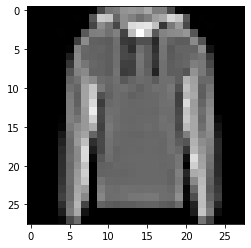

Label: Shirt
Prediction: Dress


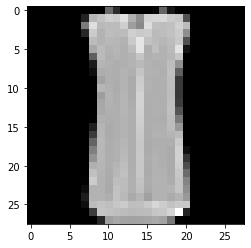

Label: Shirt
Prediction: Shirt


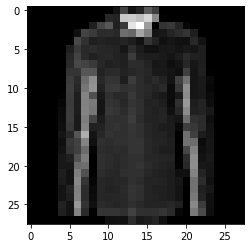

Label: Pullover
Prediction: Pullover


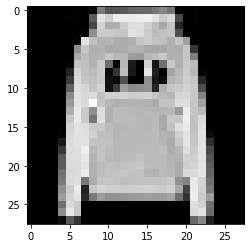

In [45]:
for i in range(10):
    show_example(i, preds, x_test, y_test)